###  print out structures

In [1]:
import random
import numpy as np
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP, MLP_linear
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)

#### Multi Layer Perceptron 1-2-1

inputs  [Value(name=val8,neuronnumber=,weightnumber=,type=i,data=1, grad=0)]
number of Value objects created =  16


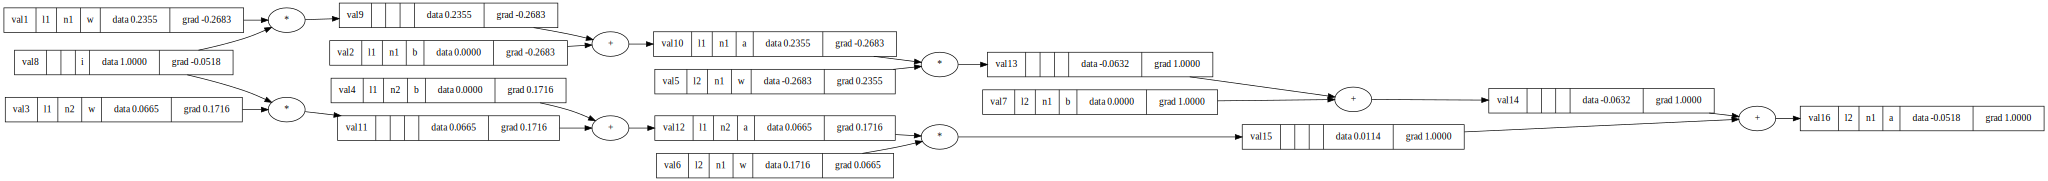

In [2]:
# initialize a model 
nin=1  #number of inputs
nout=1  #number of outputs
Value.value_counter=0

model = MLP_linear(nin, [2,  nout]) # 1-layer neural network
xinumbers = list(range(1, nin+1))
xinput = [Value(x,type='i') for x in xinumbers]
print("inputs ", xinput)

activation = model(xinput)
activation.backward()

print("number of Value objects created = ",Value.value_counter)

draw_dot(activation, debug_print_01=False)

#### Multi Layer Perceptron 1-2-2

inputs  [Value(name=val11,neuronnumber=,weightnumber=,type=i,data=1, grad=0)]
[Value(name=val19,neuronnumber=n1,weightnumber=,type=a,data=0.5312870339860895, grad=0), Value(name=val23,neuronnumber=n2,weightnumber=,type=a,data=-0.8135488551395368, grad=0)]
number of Value objects created =  35


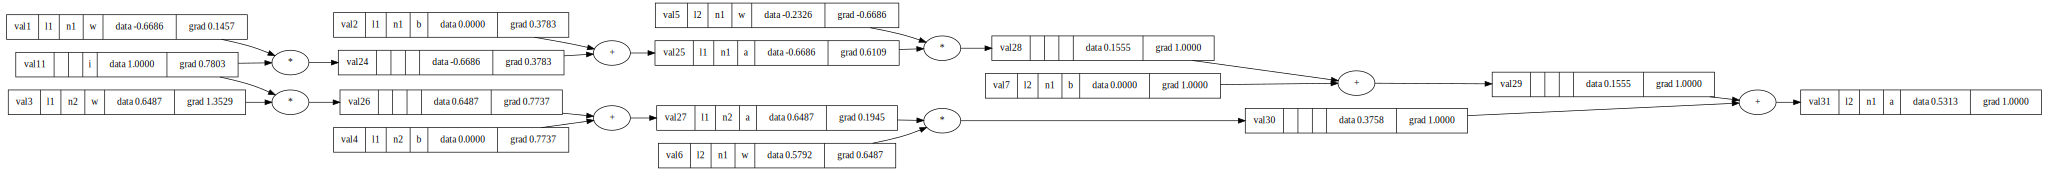

In [3]:
# initialize a model 
nin=1  #number of inputs
nout=2  #number of outputs
Value.value_counter=0

model = MLP_linear(nin, [2,  nout]) # 1-layer neural network
xinumbers = list(range(1, nin+1))
xinput = [Value(x,type='i') for x in xinumbers]
print("inputs ", xinput)

print(model(xinput))

activation=[]
activation= model(xinput)
activation[0].backward()
activation[1].backward()

print("number of Value objects created = ",Value.value_counter)

draw_dot(activation[0], debug_print_01=False)

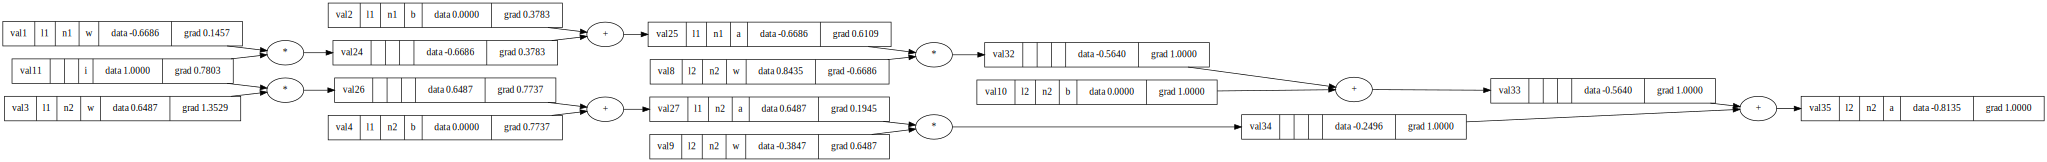

In [4]:
draw_dot(activation[1], debug_print_01=False)

#### Multi Layer Perceptron 3-4-4-1

In [5]:
# loss function single MLP
def loss_single(target,output):
    total_loss = (output - target)
    return total_loss

inputs  [Value(name=val42,neuronnumber=,weightnumber=,type=i,data=1, grad=0), Value(name=val43,neuronnumber=,weightnumber=,type=i,data=2, grad=0), Value(name=val44,neuronnumber=,weightnumber=,type=i,data=3, grad=0)]
loss=  Value(name=val112,neuronnumber=,weightnumber=,type=,data=1.7959839821833752, grad=1)
number of Value objects created =  112


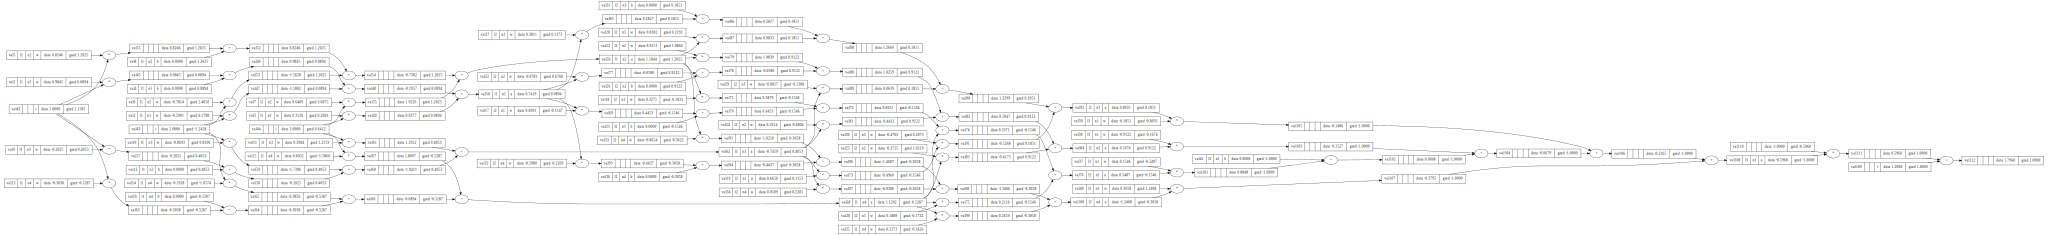

In [6]:
# initialize a model 
nin=3  #number of inputs
nout=1  #number of outputs
Value.value_counter=0

model = MLP_linear(nin, [4, 4, nout]) # 2-layer neural network
xinumbers = list(range(1, nin+1))
xinput = [Value(x,type='i') for x in xinumbers]
print("inputs ", xinput)

activation = model(xinput)

#ys = [[1.0]]  
ys=Value(1.2,type='t') # desired targets

loss=loss_single(activation,ys)
loss.backward()
print("loss= ",loss)
print("number of Value objects created = ",Value.value_counter)

draw_dot(loss, debug_print_01=False)

#### 4 times Multi Layer Perceptron 3-4-4-1

In [7]:
# loss function multiple MLP's
def loss_mult(targets,outputs):
    total_loss = sum((yout - ygt) ** 2 for ygt, yout in zip(outputs, targets))
    return total_loss


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[Value(name=val42,neuronnumber=,weightnumber=,type=,data=3, grad=0), Value(name=val43,neuronnumber=,weightnumber=,type=,data=3, grad=0), Value(name=val44,neuronnumber=,weightnumber=,type=,data=3, grad=0), Value(name=val45,neuronnumber=,weightnumber=,type=,data=3, grad=0)], [Value(name=val46,neuronnumber=,weightnumber=,type=,data=3, grad=0), Value(name=val47,neuronnumber=,weightnumber=,type=,data=3, grad=0), Value(name=val48,neuronnumber=,weightnumber=,type=,data=3, grad=0), Value(name=val49,neuronnumber=,weightnumber=,type=,data=3, grad=0)], [Value(name=val50,neuronnumber=,weightnumber=,type=,data=3, grad=0), Value(name=val51,neuronnumber=,weightnumber=,type=,data=3, grad=0), Value(name=val52,neuronnumber=,weightnumber=,type=,data=3, grad=0), Value(name=val53,neuronnumber=,weightnumber=,type=,data=3, grad=0)]]
inputs  [[Value(name=val42,neuronnumber=,weightnumber=,type=i,data=1, grad=0), Value(name=val43,neuronnumber=,weightnumber=,type=i,

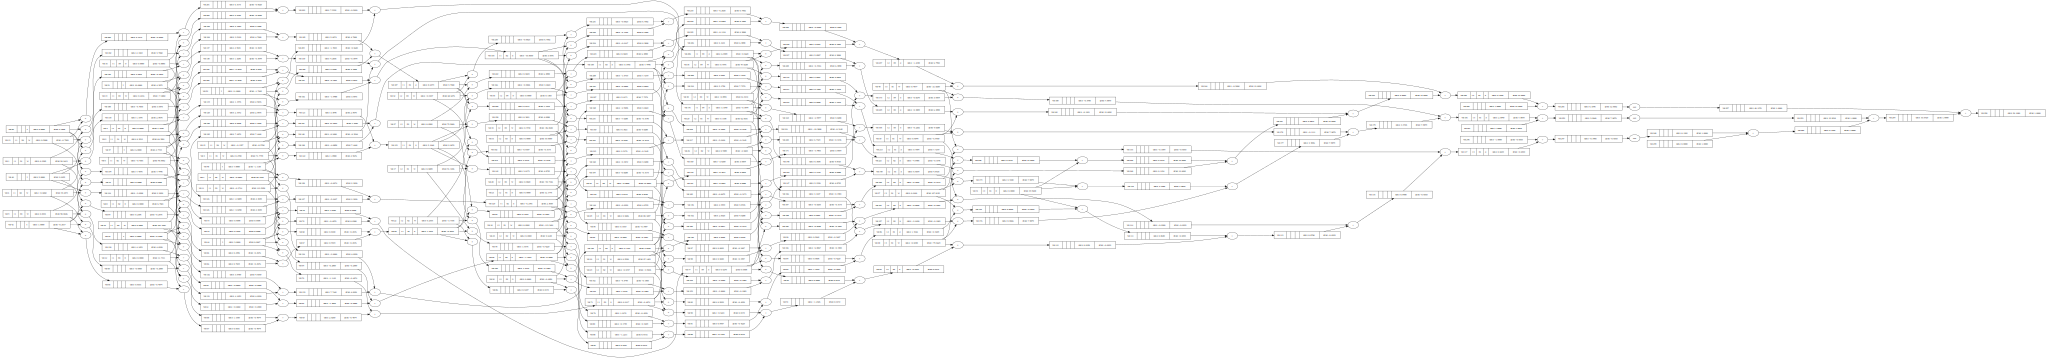

In [8]:
# initialize a model 
nin=3  #number of inputs
nout=1  #number of outputs

Value.value_counter=0

model = MLP(nin, [4, 4, nout]) # 2-layer neural network
xinumbers1 = np.array(list(range(1, nin*4+1)))
xinumbers=xinumbers1.reshape(nin, 4)
print(xinumbers)

xinput = [[Value(3) for x in range(4)] for y in range(3)] 
print(xinput)

for i in range(len(xinumbers)):
    for j in range(len(xinumbers[i])):
        xinput[i][j].type='i'
        xinput[i][j].data=xinumbers[i][j]

print("inputs ", xinput)
print("input 0 ", xinput[0])

activation = [model(x) for x in xinput]

ys = [1.0, -1.0, -1.0, 1.0]  # desired targets

loss=loss_mult(activation,ys)
print(loss)
print("number of Value objects created = ",Value.value_counter)
loss.backward()

draw_dot(loss)